In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# This line sets the default aesthetics for plots created with Seaborn, a powerful visualization library built on top of matplotlib
sns.set(style="whitegrid")

# Load the CSV (place your downloaded vgsales.csv in your working dir)
# A DataFrame (df )is the core data structure in pandas — think of it like a table in Excel or a SQL table.
df = pd.read_csv('vgsales.csv')


In [21]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [22]:
df.info()
df.head()
df.describe() #There are 11 columns, some basic info for each of them

# Drop any rows with missing Publisher or Year, 
# subset=['Publisher', 'Year']: Only check the columns 'Publisher' and 'Year' for missing values, 
# inplace=True: Apply the change directly to df (i.e. it modifies df rather than returning a new DataFrame)
print("Before:", df.shape)
df.dropna(subset=['Publisher', 'Year'], inplace=True)
print("After:", df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
Before: (16598, 11)
After: (16291, 11)


In [9]:
# An overview of the (unique) items in each column, presumably the relevant ones
print("Genres:", df['Genre'].unique())
print("Platforms:", df['Platform'].unique())
print("Names:", df['Name'].unique())
print("Publishers:", df['Publisher'].nunique(), "distinct publishers")


Genres: ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
Platforms: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Names: ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ... 'Plushees'
 'Woody Woodpecker in Crazy Castle 5' 'Know How 2']
Publishers: 576 distinct publishers


In [12]:
# First task: examine the top 5 Sports game by global sales
# Method chaining (dot...dot...dot...): typical for Pandas, fast and concise (if you know what you are doing)
top_sports = (df[df['Genre']=='Sports'] # filter rows where Genre is 'Sports' (inner df: return a Boolean Series; outer: only the TRUE)
               .groupby('Name')['Global_Sales'] # The .groupby() function is used to split a DataFrame into groups based on some column(s), 
                                                # then apply an operation (like sum(), mean(), count()), 
                                                # and finally combine the results into a new object.
               .sum() # sum the sales for each game (in case it appears more than once)
               .sort_values(ascending=False) # sort from highest to lowest sales
               .head(5)) # take the top 5
print(top_sports)


Name
Wii Sports           82.74
Wii Sports Resort    33.00
Wii Fit              22.72
Wii Fit Plus         22.00
FIFA 15              19.02
Name: Global_Sales, dtype: float64


C:\Users\dodo8\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dodo8\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


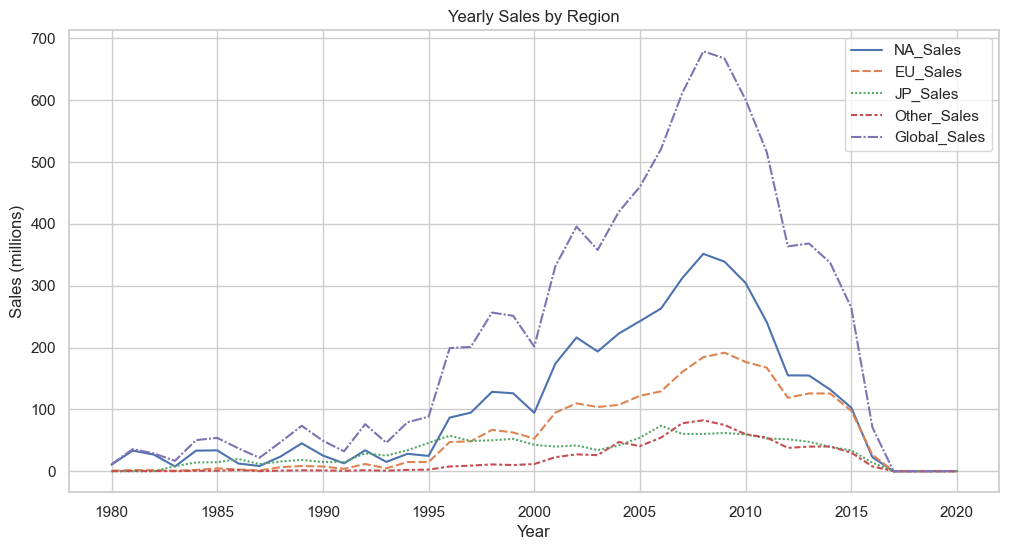

In [15]:
# Second task: Time series trends
yearly = df.groupby('Year')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum() # first, reorganize the rows.
                                                                         # the double brackets simply return a matrix (DataFrame)
yearly.index = yearly.index.astype(int)  # convert float to int

# sns.lineplot: Used to draw the actual plot with nicely styled lines,
# it doesn’t add things like the title, axis labels, or display the plot — that’s where plt. comes in.
plt.figure(figsize=(12,6)) # in inches: first define the geometry of the canvas (optional, o.w. just the default one)
sns.lineplot(data=yearly) # then we call in the data and plot
plt.title("Yearly Sales by Region") # finally we add stuffs
plt.xlabel("Year")
plt.ylabel("Sales (millions)")
plt.show()


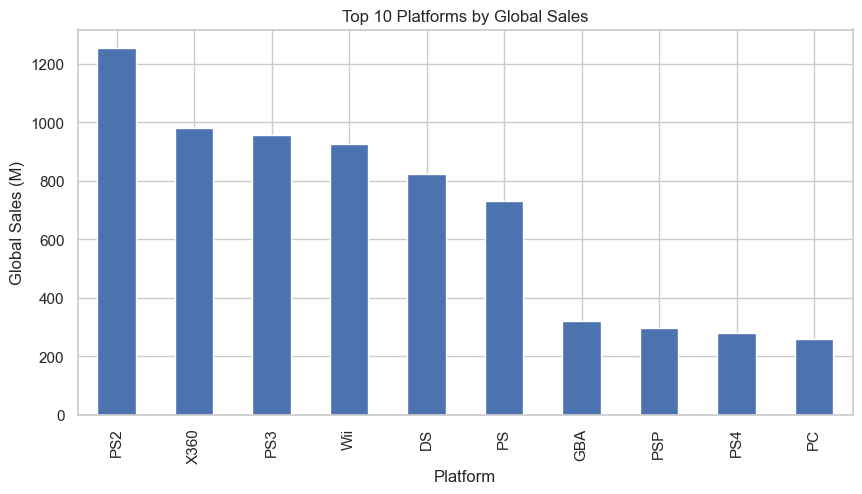

In [17]:
# Final Task: Platform Popularity Over Time
platform_totals = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10) # you shall understand this by now
# .plot() is a built-in plotting method in pandas
platform_totals.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Platforms by Global Sales")
plt.ylabel("Global Sales (M)")
plt.show()
